# Regresión Lineal

* Instalamos los requerimientos necesarios para trabajar.

In [1]:
pip install pandas

In [2]:
pip install matplotlib

In [3]:
pip install statsmodels

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as graph
import statsmodels.formula.api as smf
from scipy import stats

In [5]:
dataset = pd.read_csv('chocolate data.txt', index_col=False, sep="\t",header=0)

In [7]:
print(dataset.head())

   weight  cocoa_percent  sugar_percent  milk_percent  customer_happiness
0     185             65             11            24                  47
1     247             44             34            22                  55
2     133             33             21            47                  35
3     145             30             38            32                  34
4     110             22             70             7                  40


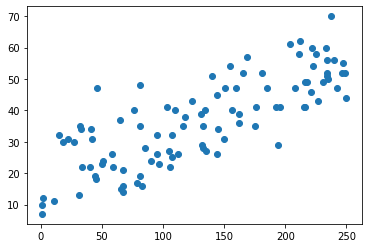

In [8]:
x = dataset['weight']
y = dataset['customer_happiness']

graph.scatter(x,y)
graph.show()

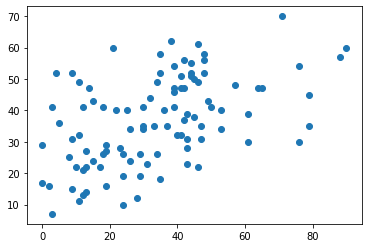

In [9]:
# Analizando los datos de cocoa 
x = dataset['cocoa_percent']
y = dataset['customer_happiness']

graph.scatter(x,y)
graph.show()

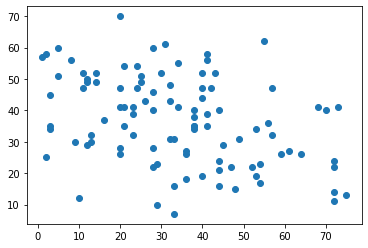

In [10]:
# Analizando los datos de % de Azúcar 
x = dataset['sugar_percent']
y = dataset['customer_happiness']

graph.scatter(x,y)
graph.show()

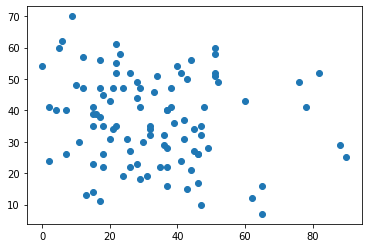

In [11]:
x = dataset['milk_percent']
y = dataset['customer_happiness']

graph.scatter(x,y)
graph.show()

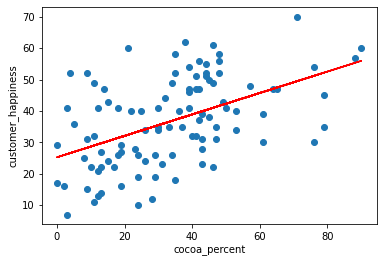

In [18]:

# DO NOT EDIT ANY OF THIS CODE

# Define a function to perform a linear regression
def PerformLinearRegression(formula):

    # This performs linear regression
    lm = smf.ols(formula = formula, data = dataset).fit()

    featureName=formula.split(" ")[-1]
    
    # get the data for the x parameter (our feature)
    train_X=dataset[featureName]
    
    # This makes and shows a graph
    intercept=lm.params[0] # b
    slope=lm.params[1] # m 
    line = slope * train_X + intercept
    graph.plot(train_X, line, '-', c = 'red')
    graph.scatter(train_X, dataset.customer_happiness)
    graph.ylabel('customer_happiness')
    graph.xlabel(featureName)
    graph.show()

    # Para la prediccion
    return lm
PerformLinearRegression('customer_happiness ~ cocoa_percent')

Ya habiamos visto que en estos datos habia mas dispersión

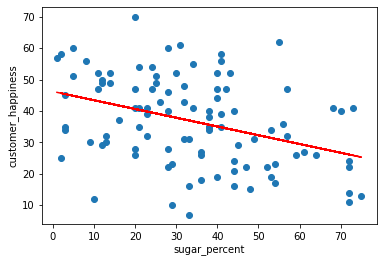

In [15]:
PerformLinearRegression('customer_happiness ~ sugar_percent')

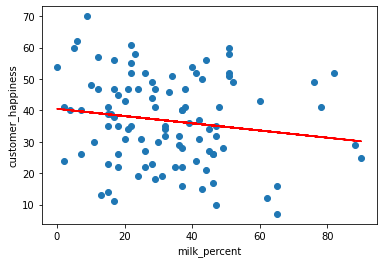

In [16]:
PerformLinearRegression('customer_happiness ~ milk_percent')

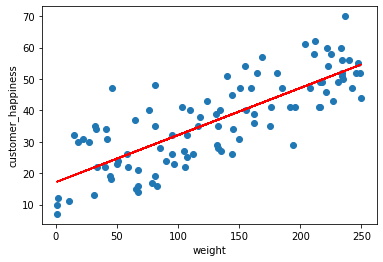

In [17]:
PerformLinearRegression('customer_happiness ~ weight')

## Para hacer una predicción

* Agregamos return lm a nuestro modelo
* Asignamos lm a la celda que ya esta ajustada a los valores del peso.

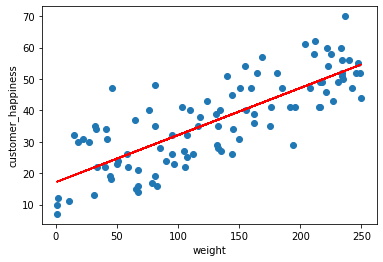

In [19]:
lm = PerformLinearRegression('customer_happiness ~ weight')

In [20]:
b = lm.params[0]
m = lm.params[1]

y = m * 350 + b 
print(b)

17.096017620806858


In [21]:
## Regresiones Lineales 

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
import pandas as pd
import statsmodels.formula.api as smf

# Imports our new data set!
dataset = pd.read_csv('chocolate data multiple linear regression.txt', index_col=False, sep="\t",header=0)

In [22]:
print(dataset.head())

   weight  cocoa_percent   cost  customer_happiness
0     247           0.11   0.25                  29
1     192           0.82  10.44                  29
2     106           0.01   0.00                   6
3      78           0.04   0.01                   4
4     213           0.39   2.56                  30


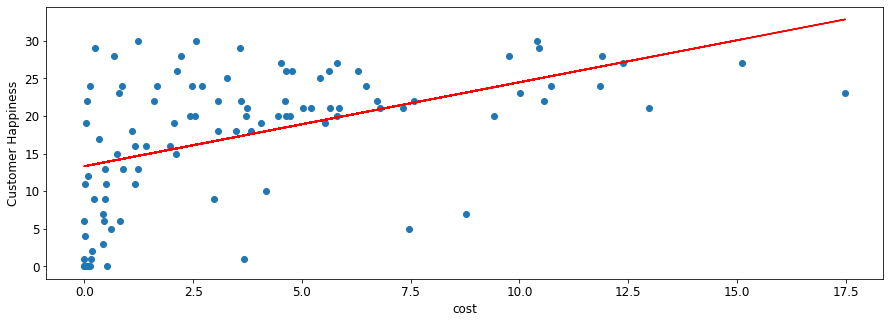

In [32]:
formula = 'customer_happiness ~ cost'
# This performs linear regression
lm = smf.ols(formula = formula, data = dataset).fit()

featureName = formula.split(" ")[-1]

# Get the data for the x parameter (the feature)
x = dataset[featureName]

# This makes and shows a graph
intercept = lm.params[0]
slope = lm.params[1]
line = slope * x + intercept
graph.plot(x, line, '-', c = 'red')
graph.scatter(x, dataset.customer_happiness)
graph.ylabel('Customer Happiness')
graph.xlabel(featureName)
graph.show()

In [33]:
print(lm.rsquared)

0.24243472405017064


In [35]:
formula = 'customer_happiness ~ weight + cocoa_percent + cost'
###

# This creates a new model with all three features
lm = smf.ols(formula = formula, data = dataset).fit()

# Print the coefficients (slopes) of our new model
print(lm.params)

print("R²: " + str(lm.rsquared))

Intercept        -9.338917
weight            0.106411
cocoa_percent    31.935786
cost             -1.314457
dtype: float64
R²: 0.5554156557713101


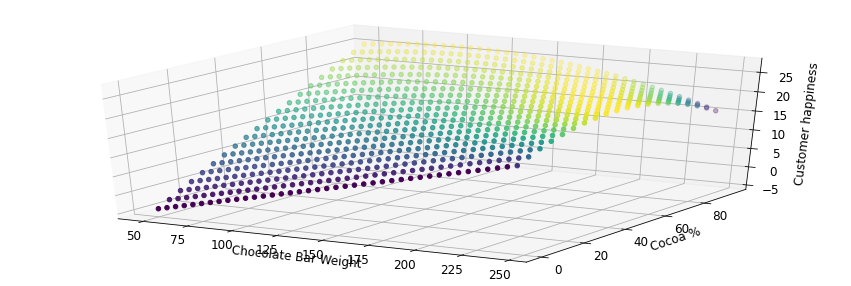

In [38]:
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
def CalculateCustomerHappiness(weight, cocoa_percent):
    # This calculates the customer happiness for a given bar of chocolate
    cocoa_fraction = cocoa_percent / 100
    cost = (weight * 0.05 + weight * cocoa_fraction)**2 * 0.0004
    
    # First coefficient
    coeff_intercept = lm.params[0]
    
    # Second coefficient
    coeff_weight = lm.params[1]
    
    # Third coefficient
    coeff_cocoa = lm.params[2]
    
    # Fourth coefficient
    coeff_cost = lm.params[3]
     
    customer_happiness = (coeff_intercept) + (weight * coeff_weight) + (cocoa_fraction * coeff_cocoa) + (cost * coeff_cost)
    ###
    
    return customer_happiness
       
    
# Don't edit this part! This creates our graph.
def Graph3d():
    # This creates a 3D graph of likely customer happiness with different types of chocolate bar
    fig = graph.figure()
    ax = fig.add_subplot(111, projection='3d')

    cocoaPercentages=range(0,100,5)
    for weight in range(50,250,5):
        happiness=[]
        for cocoa in cocoaPercentages:
            happiness.append(CalculateCustomerHappiness(weight,cocoa))

        ax.scatter(np.full(len(happiness),weight), cocoaPercentages, happiness,c=happiness)

    ax.set_xlabel('Chocolate Bar Weight')
    ax.set_ylabel('Cocoa %')
    ax.set_zlabel('Customer happiness')

    graph.show()
    
Graph3d()